In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [5]:
df_2020 = pd.read_csv('../../dobrano_2020_pre_preprocessado.csv', sep=';', low_memory=False, encoding='latin1')
df_2020.shape

(500000, 21)

In [6]:
df_2020.head(5)

,IDADE,SEXO,RACACOR,ESC2010,LOCOCOR,CODMUNOCOR,ASSISTMED,CIRCOBITO,FONTE,DIA_NASC,MES_NASC,ANO_NASC,DIA_OBITO,MES_OBITO,ANO_OBITO,ANOS_IDADE,ESTADO,GRUPO_CAUSA_BASICA,CAUSA_BASICA,OCUPACAO,GRUPO_OCUPACAO
0,68.0,M,BRANCA,EF_I,DOMICILIO,316930,NAO,NaN,NaN,10,5.0,1951.0,25,1,2020,68.0,MG,Causas mal definidas e desconhecidas de mortal...,Outras causas mal definidas e as não especific...,NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
1,53.0,M,PRETA,EF_I,DOMICILIO,316930,NAO,NaN,NaN,16,3.0,1966.0,25,1,2020,53.0,MG,Causas mal definidas e desconhecidas de mortal...,Outras causas mal definidas e as não especific...,Trabalhador agropecuário em geral,"TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA P..."
2,82.0,F,BRANCA,EF_I,HOSPITAL,316930,NaN,NaN,NaN,10,7.0,1937.0,14,1,2020,82.0,MG,Outras doenças dos intestinos,"Doença diverticular do intestino, de localizaç...",NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
3,73.0,F,BRANCA,EF_I,HOSPITAL,316930,SIM,NaN,NaN,2,11.0,1946.0,20,1,2020,73.0,MG,Outras doenças do aparelho respiratório,Insuficiência respiratória aguda,NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
4,60.0,M,BRANCA,SUPERIOR_C,HOSPITAL,316930,SIM,NaN,NaN,12,9.0,1959.0,26,1,2020,60.0,MG,Outras doenças bacterianas,Septicemia não especificada,Professor da educação de jovens e adultos do ...,PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES ...


In [7]:
causas = df_2020.CAUSA_BASICA.value_counts()
causas

Infecção por coronavírus de localização não especificada                                                                                                               52616
Infarto agudo do miocárdio não especificado                                                                                                                            28212
Outras causas mal definidas e as não especificadas de mortalidade                                                                                                      19872
Pneumonia não especificada                                                                                                                                             13608
Hipertensão essencial (primária)                                                                                                                                       11830
                                                                                                                                       

In [16]:
df_2018 = pd.read_csv('../../dobrano_2018_pre_preprocessado.csv', header=0, sep=',', low_memory=False, encoding='latin1')
df_2018.shape

(500000, 39)

In [17]:
df_2018.head(5)

,Unnamed: 0,NATURAL,IDADE,SEXO,RACACOR,ESC2010,OCUP,LOCOCOR,ESTABDESCR,CODMUNOCOR,ASSISTMED,EXAME,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,CIRCOBITO,FONTE,CAUSABAS_O,ATESTADO,DTRECORIGA,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBIN,NUDIASINF,DTCADINF,FONTESINF,DIA_NASC,MES_NASC,ANO_NASC,DIA_OBITO,MES_OBITO,ANO_OBITO,ESTADO,GRUPO_CAUSA_BASICA,CAUSA_BASICA
0,0,16.0,452,M,BRANCA,SUPERIOR_C,214120.0,OES,NaN,330010,I,NaN,*R99X,NaN,NaN,NaN,NaN,R99,NaN,NaN,R99,R99,29052018,0.0,1,428,NaN,NaN,NaN,NaN,3,11.0,1965.0,25,4,2018,RJ,Causas mal definidas e desconhecidas de mortal...,Outras causas mal definidas e as nÃ£o especifi...
1,1,812.0,204,F,INDIGENA,NaN,NaN,OUTROS,NaN,120032,NaN,NaN,*P291,*P285,*P239,*P002,NaN,P002,NaN,NaN,NaN,P291/P285/P239/P002,21052019,0.0,1,362,NaN,NaN,NaN,NaN,20,5.0,2018.0,24,5,2018,AC,Feto e recÃ©m-nascido afetados por fatores mat...,Feto e recÂm-nascido afetados por doenÂas in...
2,2,812.0,492,M,INDIGENA,SEM,NaN,DOMICILIO,NaN,120030,SIM,NaN,*I219,*I517,NaN,NaN,NaN,I219,NaN,NaN,NaN,I219/I517,22022018,0.0,1,8,NaN,NaN,NaN,NaN,2,6.0,1925.0,14,2,2018,AC,DoenÃ§as isquÃªmicas do coraÃ§Ã£o,Infarto agudo do miocÂ rdio nÃo especificado
3,3,812.0,489,F,INDIGENA,SEM,NaN,DOMICILIO,NaN,120030,NAO,NaN,*J960,*J159,NaN,NaN,*I500,J159,NaN,NaN,NaN,J960/J159*I500,9042019,0.0,1,252,NaN,NaN,NaN,NaN,25,8.0,1928.0,31,7,2018,AC,Influenza [gripe] e pneumonia,Pneumonia bacteriana nÃo especificada
4,4,812.0,477,M,PARDA,EF_I,999993.0,DOMICILIO,NaN,120005,NaN,NaN,*C711,NaN,NaN,NaN,NaN,C711,NaN,NaN,C711,C711,28092018,0.0,1,7,NaN,NaN,NaN,NaN,4,7.0,1941.0,21,9,2018,AC,"Neoplasias malignas dos olhos, do encÃ©falo e ...",Neoplasia maligna do lobo frontal


In [19]:
df_2019 = pd.read_csv('../../dobrano_2019_pre_preprocessado.csv', header=0, sep=',', low_memory=False, encoding='latin1')
df_2019.shape

(500000, 38)

In [20]:
df_2019.head(5)

,Unnamed: 0,NATURAL,IDADE,SEXO,RACACOR,ESC2010,OCUP,LOCOCOR,CODMUNOCOR,ASSISTMED,EXAME,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,CIRCOBITO,FONTE,CAUSABAS_O,ATESTADO,DTRECORIGA,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBIN,NUDIASINF,DTCADINF,FONTESINF,DIA_NASC,MES_NASC,ANO_NASC,DIA_OBITO,MES_OBITO,ANO_OBITO,ESTADO,GRUPO_CAUSA_BASICA,CAUSA_BASICA
0,0,829.0,457,M,PRETA,EF_I,512105.0,HOSPITAL,290750,SIM,NaN,*R570,*J81X,*I10X,*N189,NaN,I120,NaN,NaN,I120,R570/J81/I10/N189,13022019,0.0,1,23,NaN,NaN,NaN,NaN,18,2.0,1961.0,21,1,2019,BA,DoenÃ§as hipertensivas,DoenÂa renal hipertensiva com insuficiÂncia ...
1,1,829.0,480,F,NaN,SEM,999992.0,HOSPITAL,290750,NaN,NaN,*A419,NaN,NaN,NaN,NaN,A419,NaN,NaN,A419,A419,13022019,0.0,1,16,NaN,NaN,NaN,NaN,3,7.0,1938.0,28,1,2019,BA,Outras doenÃ§as bacterianas,Septicemia nÃo especificada
2,2,829.0,473,F,PARDA,EF_I,999992.0,HOSPITAL,290750,NaN,NaN,*I500,*I10X,*E039,NaN,NaN,E039,NaN,NaN,E039,I500/I10/E039,13022019,0.0,1,17,NaN,NaN,NaN,NaN,15,11.0,1945.0,27,1,2019,BA,Transtornos da glÃ¢ndula tireÃ³ide,Hipotireoidismo nÃo especificado
3,3,829.0,447,M,PARDA,EM,NaN,HOSPITAL,290750,SIM,NaN,*J960,*R220,NaN,NaN,NaN,R220,NaN,NaN,R220,J960/R220,13022019,0.0,1,32,NaN,NaN,NaN,NaN,4,11.0,1971.0,12,1,2019,BA,Sintomas e sinais relativos Ã pele e ao tecid...,"TumefaÂÃo, massa ou tumoraÂÃo localizadas ..."
4,4,829.0,472,F,PARDA,SEM,999992.0,HOSPITAL,290750,NaN,NaN,*J960,*C159,NaN,NaN,NaN,C159,NaN,NaN,C159,J960/C159,13022019,0.0,1,34,NaN,NaN,NaN,NaN,12,10.0,1946.0,10,1,2019,BA,Neoplasias malignas dos Ã³rgÃ£os digestivos,"Neoplasia maligna do esÂfago, nÃo especificado"


In [24]:
df_2019 = df_2019.drop(columns=['NATURAL', 'EXAME', 'FONTESINF', 'DTCADINF', 'NUDIASOBIN', 'STDONOVA', 'STDOEPIDEM', 'DTRECORIGA', 'DIFDATA', 'NUDIASOBIN', 'NUDIASINF', 'ATESTADO', 'CODMUNOCOR'])

In [26]:
df_2019 = df_2019.drop(columns=['Unnamed: 0'])

In [28]:
fem = df_2019.loc[df_2019['SEXO'] == 'F']
mas = df_2019.loc[df_2019['SEXO'] == 'M']

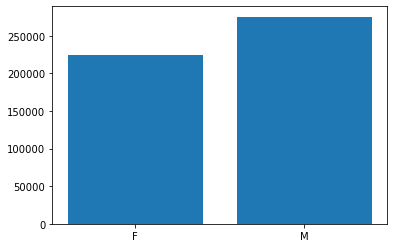

224350
275472


In [46]:
# ax = fig.add_axes([0,0,1,1])
plt.bar(['F', 'M'], [fem.shape[0], mas.shape[0]])
# plt.xticks(2, ('F', 'M'))
plt.show()
print(fem.shape[0])
print(mas.shape[0])

In [8]:
causas = df_2019.CAUSA_BASICA.value_counts()
causas

NameError: name 'df_2019' is not defined

In [9]:
causas = causas[:10]

In [10]:
causas

Infecção por coronavírus de localização não especificada                      52616
Infarto agudo do miocárdio não especificado                                   28212
Outras causas mal definidas e as não especificadas de mortalidade             19872
Pneumonia não especificada                                                    13608
Hipertensão essencial (primária)                                              11830
Acidente vascular cerebral, não especificado como hemorrágico ou isquêmico    11305
Diabetes mellitus não especificado - sem complicações                         10314
Neoplasia maligna dos brônquios ou pulmões, não especificado                   8653
Doença de Alzheimer não especificada                                           6857
Infecção do trato urinário de localização não especificada                     6417
Name: CAUSA_BASICA, dtype: int64

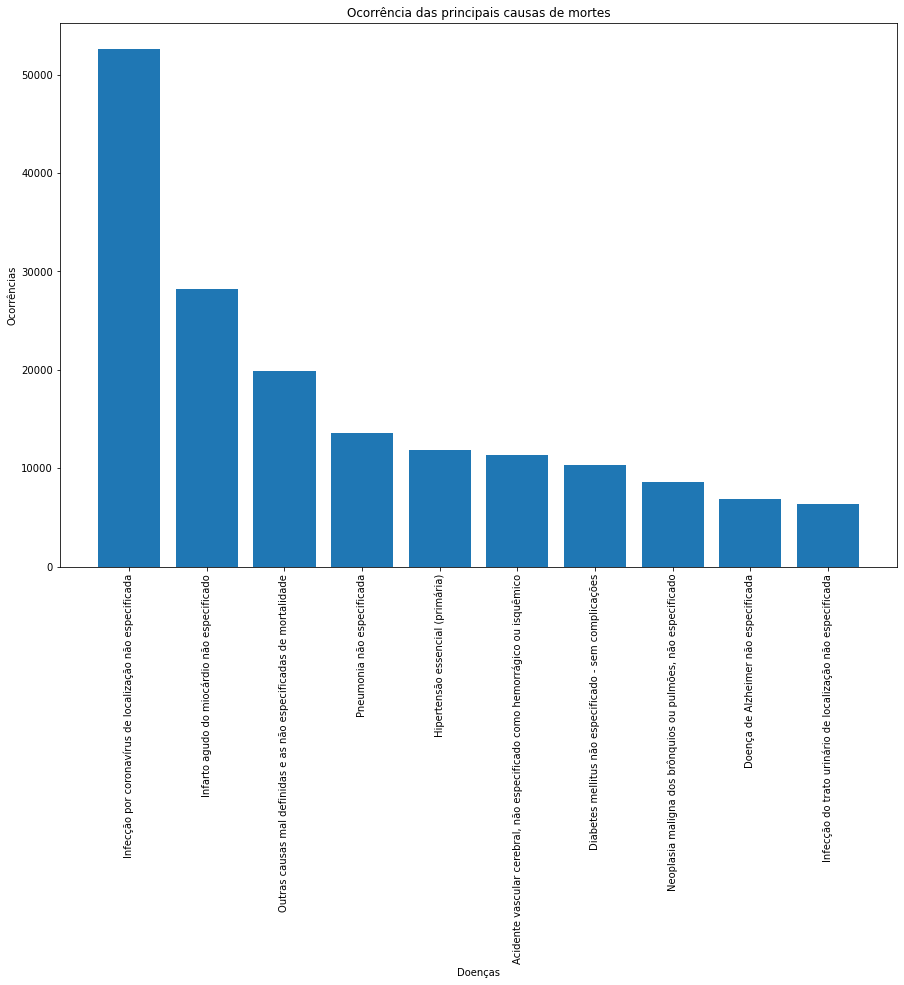

In [11]:
fig = plt.figure(figsize=(15,10))
plt.bar(causas.index, causas.values)
plt.xticks(rotation='vertical')
plt.xlabel('Doenças')
plt.ylabel('Ocorrências')
plt.title('Ocorrência das principais causas de mortes')
plt.show()

In [9]:
import json
causas_dict = causas.to_dict()
causas_dict

{'Infecção por coronavírus de localização não especificada': 52616,
 'Infarto agudo do miocárdio não especificado': 28212,
 'Outras causas mal definidas e as não especificadas de mortalidade': 19872,
 'Pneumonia não especificada': 13608,
 'Hipertensão essencial (primária)': 11830,
 'Acidente vascular cerebral, não especificado como hemorrágico ou isquêmico': 11305,
 'Diabetes mellitus não especificado - sem complicações': 10314,
 'Neoplasia maligna dos brônquios ou pulmões, não especificado': 8653,
 'Doença de Alzheimer não especificada': 6857,
 'Infecção do trato urinário de localização não especificada': 6417}

In [13]:
causas.to_json(path_or_buf="../../principais_doencas.json", index=True, indent=4, force_ascii=False)

In [17]:
json.dumps(causas, indent=4, ensure_ascii=False)

TypeError: Object of type Series is not JSON serializable